<a href="https://colab.research.google.com/github/XavierCarrera/natural-language-processing/blob/main/Language_Tokens_and_Text_Corpus_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import re
nltk.download("book")
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np
nltk.download("cess_esp")

In [5]:
corpus = nltk.corpus.cess_esp.sents()
print(corpus)
print(len(corpus))

[['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.'], ['Una', 'portavoz', 'de', 'EDF', 'explicó', 'a', 'EFE', 'que', 'el', 'proyecto', 'para', 'la', 'construcción', 'de', 'Altamira_2', ',', 'al', 'norte', 'de', 'Tampico', ',', 'prevé', 'la', 'utilización', 'de', 'gas', 'natural', 'como', 'combustible', 'principal', 'en', 'una', 'central', 'de', 'ciclo', 'combinado', 'que', 'debe', 'empezar', 'a', 'funcionar', 'en', 'mayo_del_2002', '.'], ...]
6030


In [8]:
flatten = [w for l in corpus for w in l]
print(len(flatten))
print(flatten[:20])

192685
['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana']


# Regular Expression Functions

In [10]:
arr = [w for w in flatten if re.search('es', w)]
print(arr[:5])

['estatal', 'jueves', 'empresa', 'centrales', 'francesa']


In [11]:
arr = [w for w in flatten if re.search('es$', w)]
print(arr[:5])

['jueves', 'centrales', 'millones', 'millones', 'dólares']


In [12]:
arr = [w for w in flatten if re.search('^es', w)]
print(arr[:5])

['estatal', 'es', 'esta', 'esta', 'eso']


In [14]:
# Ranges

arr = [w for w in flatten if re.search('^[ghi]', w)]
print(arr[:10])

['grupo', 'hoy', 'gas', 'gas', 'intervendrá', 'invertir', 'gas', 'hoy', 'insulto', 'intervención']


In [15]:
# Closure
# * repeat +0 times
# + repeat +1 times

arr = [w for w in flatten if re.search('^(no)*', w)]
print(arr[:20])

['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana']


In [16]:
arr = [w for w in flatten if re.search('^(no)+', w)]
print(arr[:20])

['norte', 'no', 'no', 'noche', 'no', 'no', 'notificación', 'no', 'no', 'no', 'no_obstante', 'no', 'no', 'no', 'norte', 'no', 'no', 'no', 'no', 'norteamericano']


# Token Normalization

In [17]:
text = """Cuando sea el rey del mundo  (imaginaba él en su cabeza) no tendré que  preocuparme por estas bobadas.          
Era solo un niño de 7 años, pero pensaba que podría ser cualquier cosa que su imaginación le permitiera visualizar en su cabeza"""

In [19]:
# Case 1: Tokenize empty spaces

print(re.split(r' ', text))

['Cuando', 'sea', 'el', 'rey', 'del', 'mundo', '', '(imaginaba', 'él', 'en', 'su', 'cabeza)', 'no', 'tendré', 'que', '', 'preocuparme', 'por', 'estas', 'bobadas.', '', '', '', '', '', '', '', '', '', '\nEra', 'solo', 'un', 'niño', 'de', '7', 'años,', 'pero', 'pensaba', 'que', 'podría', 'ser', 'cualquier', 'cosa', 'que', 'su', 'imaginación', 'le', 'permitiera', 'visualizar', 'en', 'su', 'cabeza']


In [22]:
# Case 2: Tokenize with Regex

print(re.split(r'[ \t\n]+', text))

['Cuando', 'sea', 'el', 'rey', 'del', 'mundo', '(imaginaba', 'él', 'en', 'su', 'cabeza)', 'no', 'tendré', 'que', 'preocuparme', 'por', 'estas', 'bobadas.', 'Era', 'solo', 'un', 'niño', 'de', '7', 'años,', 'pero', 'pensaba', 'que', 'podría', 'ser', 'cualquier', 'cosa', 'que', 'su', 'imaginación', 'le', 'permitiera', 'visualizar', 'en', 'su', 'cabeza']


In [23]:
# Case 3

print(re.split(r'[ \W\t\n]+', text))

['Cuando', 'sea', 'el', 'rey', 'del', 'mundo', 'imaginaba', 'él', 'en', 'su', 'cabeza', 'no', 'tendré', 'que', 'preocuparme', 'por', 'estas', 'bobadas', 'Era', 'solo', 'un', 'niño', 'de', '7', 'años', 'pero', 'pensaba', 'que', 'podría', 'ser', 'cualquier', 'cosa', 'que', 'su', 'imaginación', 'le', 'permitiera', 'visualizar', 'en', 'su', 'cabeza']


In [24]:
text2 = "En los E.U. esa postal vale $15.50 ..."
print(re.split(r'[ \W\t\n]+', text2))

['En', 'los', 'E', 'U', 'esa', 'postal', 'vale', '15', '50', '']


In [ ]:
# set flag to allow verbose regexps                 (?x)                                   
# abbreviations, e.g. U.S.A.                        (?:[A-Z]\\.)+                           
# words with optional internal hyphens              | \\w+(?:-\\w+)*                        
# currency and percentages, e.g. $12.40, 82%\n","   | \\$?\\d+(?:\\.\\d+)?%?               
# ellipsis                                          | \.\.\.                               
 # these are separate tokens; includes ], [         | [][.,;\"'?():-_`]      

pattern = r"""(?x)                                   
              (?:[A-Z]\\.)+                          
              | \\w+(?:-\\w+)*                       
              | \\$?\\d+(?:\\.\\d+)?%?              
              | \.\.\.                             
              | [][.,;\"'?():-_`]       
"""

nltk.regexp_tokenize(text2, pattern)

# Basic Language Statistics

In [31]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [32]:
text1.tokens[:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [33]:
print(len(text1))

260819


In [41]:
vocabulary = sorted(set(text1))
print(vocabulary[1000:1050])

['Crew', 'Crish', 'Crockett', 'Cross', 'Crossed', 'Crossing', 'Crotch', 'Crowding', 'Crown', 'Crozetts', 'Cruelty', 'Cruising', 'Cruppered', 'Crusaders', 'Crushed', 'Crying', 'Cuba', 'Curious', 'Curse', 'Cursed', 'Curses', 'Cussed', 'Customs', 'Cut', 'Cutter', 'Cutting', 'Cuvier', 'Cyclades', 'Czar', 'D', 'DAGGOO', 'DAM', 'DANCE', 'DANCING', 'DANIEL', 'DANISH', 'DARKENS', 'DARWIN', 'DAVENANT', 'DEAD', 'DEATH', 'DEBELL', 'DECK', 'DEL', 'DESTROYED', 'DEVIL', 'DICTIONARY', 'DID', 'DIGNITY', 'DISCOVERS']


In [39]:
lr = len(vocabulary)/len(text1)
print(lex_rich)

0.07406285585022564


In [42]:
def lexic_richness(text):
  vocabulary = sorted(set(text))
  return len(vocabulary)/len(text)

lexic_richness(text1)

0.07406285585022564

In [45]:
def percantage_word(word, text):
  return 100*text.count(word)/len(text)

percantage_word("monster", text1)

0.018786974875296663

In [46]:
text1.count("monster")

49

In [47]:
dic = {}

for word in set(text1):
  dic[word] = text1.count(word)
dic

{'classical': 1,
 'LOST': 1,
 'solemnity': 2,
 'operator': 1,
 'dishes': 1,
 'inspecting': 1,
 'involuntary': 3,
 'elaboration': 1,
 'Hyena': 3,
 'entrapped': 2,
 'eave': 1,
 'incommoding': 1,
 'regal': 4,
 'curing': 2,
 'greybeards': 1,
 'Albatross': 3,
 'flatter': 1,
 'substance': 31,
 'enclosed': 1,
 'volcanoes': 2,
 'charging': 1,
 'allures': 2,
 'hollow': 20,
 'staggers': 2,
 'repute': 1,
 'descried': 22,
 'ceiling': 6,
 'Returning': 2,
 'flake': 1,
 'IVORY': 2,
 'pier': 1,
 'usefulness': 1,
 'wanting': 11,
 'Ashore': 1,
 'Careful': 2,
 'hintings': 1,
 'affair': 17,
 'invite': 1,
 'firm': 15,
 'turn': 54,
 'mop': 1,
 'healthy': 5,
 'unreliable': 1,
 'crackest': 1,
 'piety': 2,
 'fatalities': 1,
 'waist': 11,
 'Riotous': 1,
 'festoon': 2,
 'Emperor': 4,
 'clings': 1,
 'pea': 2,
 'exalted': 3,
 'anonymous': 2,
 'higgledy': 1,
 'pursuing': 5,
 'suspicion': 4,
 'translation': 1,
 'mimicking': 1,
 'consist': 3,
 'whereto': 1,
 'Canada': 2,
 'Spitzbergen': 4,
 'overbearing': 4,
 'suffer

In [48]:
# FreqDist from NLTK

fdist = FreqDist(text1)
fdist.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

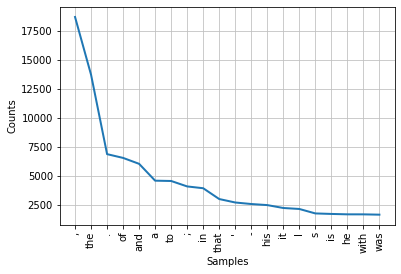

In [49]:
fdist.plot(20)

In [51]:
fdist['monster']

49

In [52]:
# Filtering tokens

long_words = [word for word in text1 if len(word)>5]
long_words

['Herman',
 'Melville',
 'ETYMOLOGY',
 'Supplied',
 'Consumptive',
 'Grammar',
 'School',
 'threadbare',
 'dusting',
 'lexicons',
 'grammars',
 'handkerchief',
 'mockingly',
 'embellished',
 'nations',
 'grammars',
 'somehow',
 'mildly',
 'reminded',
 'mortality',
 'school',
 'others',
 'called',
 'tongue',
 'leaving',
 'through',
 'ignorance',
 'letter',
 'almost',
 'maketh',
 'signification',
 'deliver',
 'HACKLUYT',
 'animal',
 'roundness',
 'rolling',
 'arched',
 'vaulted',
 'WEBSTER',
 'DICTIONARY',
 'immediately',
 'WALLEN',
 'wallow',
 'RICHARDSON',
 'DICTIONARY',
 'DANISH',
 'SWEDISH',
 'ICELANDIC',
 'ENGLISH',
 'BALEINE',
 'FRENCH',
 'BALLENA',
 'SPANISH',
 'ERROMANGOAN',
 'EXTRACTS',
 'Supplied',
 'Librarian',
 'painstaking',
 'burrower',
 'appears',
 'through',
 'Vaticans',
 'street',
 'stalls',
 'picking',
 'whatever',
 'random',
 'allusions',
 'whales',
 'anyways',
 'whatsoever',
 'sacred',
 'profane',
 'Therefore',
 'higgledy',
 'piggledy',
 'statements',
 'however',
 'au

In [53]:
filtered_vocabulary = sorted(set(long_words))
filtered_vocabulary[:10]

['ACCOUNT',
 'ADDITIONAL',
 'ADVANCING',
 'ADVENTURES',
 'AFFGHANISTAN',
 'AFRICA',
 'AGAINST',
 'ALFRED',
 'ALGERINE',
 'AMERICA']

In [54]:
interesting_words = [(word, fdist[word]) for word in set(text1) if len(word)>5 and fdist[word]>10]
interesting_words

[('substance', 31),
 ('hollow', 20),
 ('descried', 22),
 ('wanting', 11),
 ('affair', 17),
 ('unaccountable', 16),
 ('father', 16),
 ('pointing', 19),
 ('resting', 12),
 ('peculiarities', 11),
 ('careful', 16),
 ('giving', 26),
 ('lovely', 11),
 ('though', 335),
 ('largest', 19),
 ('between', 117),
 ('partly', 13),
 ('interval', 25),
 ('fifteen', 11),
 ('Pacific', 32),
 ('pushed', 15),
 ('superior', 14),
 ('alongside', 27),
 ('harpoons', 30),
 ('finally', 23),
 ('Coffin', 14),
 ('whaling', 116),
 ('completely', 33),
 ('harpooneer', 77),
 ('gliding', 13),
 ('sailor', 49),
 ('Atlantic', 19),
 ('gunwale', 21),
 ('figure', 19),
 ('remains', 24),
 ('swiftly', 19),
 ('loaded', 12),
 ('account', 32),
 ('direct', 11),
 ('virtue', 16),
 ('latitude', 13),
 ('utterly', 13),
 ('elsewhere', 11),
 ('chains', 18),
 ('blackness', 11),
 ('things', 132),
 ('hitherto', 16),
 ('landlord', 27),
 ('actually', 16),
 ('connected', 12),
 ('received', 26),
 ('height', 17),
 ('become', 28),
 ('placed', 36),
 ('l

In [57]:
dtypes = [("word", "S10"), ("frequency", int)]
interesting_words = np.array(interesting_words, dtype = dtypes)

In [58]:
interesting_words

array([(b'substance',  31), (b'hollow',  20), (b'descried',  22),
       (b'wanting',  11), (b'affair',  17), (b'unaccounta',  16),
       (b'father',  16), (b'pointing',  19), (b'resting',  12),
       (b'peculiarit',  11), (b'careful',  16), (b'giving',  26),
       (b'lovely',  11), (b'though', 335), (b'largest',  19),
       (b'between', 117), (b'partly',  13), (b'interval',  25),
       (b'fifteen',  11), (b'Pacific',  32), (b'pushed',  15),
       (b'superior',  14), (b'alongside',  27), (b'harpoons',  30),
       (b'finally',  23), (b'Coffin',  14), (b'whaling', 116),
       (b'completely',  33), (b'harpooneer',  77), (b'gliding',  13),
       (b'sailor',  49), (b'Atlantic',  19), (b'gunwale',  21),
       (b'figure',  19), (b'remains',  24), (b'swiftly',  19),
       (b'loaded',  12), (b'account',  32), (b'direct',  11),
       (b'virtue',  16), (b'latitude',  13), (b'utterly',  13),
       (b'elsewhere',  11), (b'chains',  18), (b'blackness',  11),
       (b'things', 132), (b'

In [59]:
interesting_words = np.sort(interesting_words, order = "frequency")
interesting_words

array([(b'America',  11), (b'Father',  11), (b'Fleece',  11),
       (b'Guernsey',  11), (b'Heaven',  11), (b'NANTUCKET',  11),
       (b'Perseus',  11), (b'Ramadan',  11), (b'Therefore',  11),
       (b'additional',  11), (b'advanced',  11), (b'appearance',  11),
       (b'baleen',  11), (b'barbaric',  11), (b'beating',  11),
       (b'begins',  11), (b'beholding',  11), (b'belong',  11),
       (b'blackness',  11), (b'blanket',  11), (b'blessed',  11),
       (b'butter',  11), (b'central',  11), (b'clothes',  11),
       (b'coiled',  11), (b'commotion',  11), (b'concluding',  11),
       (b'contact',  11), (b'convenient',  11), (b'covered',  11),
       (b'cursed',  11), (b'demanded',  11), (b'desired',  11),
       (b'direct',  11), (b'element',  11), (b'elevated',  11),
       (b'elsewhere',  11), (b'excellent',  11), (b'experience',  11),
       (b'fashion',  11), (b'fashioned',  11), (b'fastened',  11),
       (b'features',  11), (b'fellows',  11), (b'fierce',  11),
       (b'fif

# Language Plotting

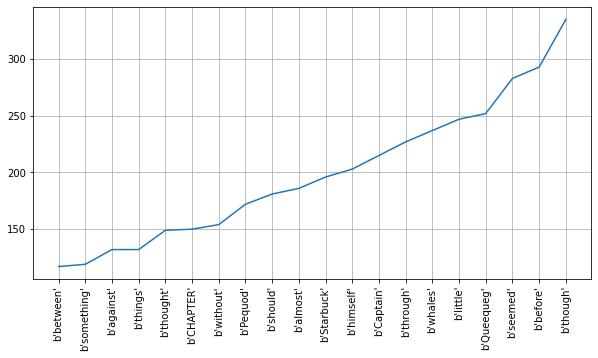

In [62]:
top_words = 20
x = np.arange(len(interesting_words[-top_words:]))
y = [freq[1] for freq in interesting_words[-top_words:]]
plt.figure(figsize = (10, 5))
plt.plot(x, y)
plt.xticks(x, [str(freq[0]) for freq in interesting_words[-top_words:]], rotation = "vertical")
plt.grid(True)
plt.show()